In [294]:
#import all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [295]:
#We will be reading training data set here

trainingFile = 'Trainset.csv'
trainingSet = pd.read_csv(trainingFile, sep=',', names=["PageLike","Checkins","Pagetalkingabt","PgCategory","D1","D2","D3","D4",
          "D5","D6","D7","D8","D9","D10","D11","D12","D13",
          "D14","D15","D16","D17","D18","D19","D20","D21","D22","D23","D24","D25",
          "CC1","CC2","CC3","CC4","CC5","Time","Length","PostSharecnt","PostPromotionStatus","Hours","PSun","PMon","PTue","PWed","PThurs","PFri","PSat",
          "BSun","BMon","BTue","BWed","BThurs","BFri","BSat","Target"])

#and here we would be reading the test set data

testingFile = 'Testset.csv'
testingSet = pd.read_csv(testingFile, sep=',', names=["PageLike","Checkins","Pagetalkingabt","PgCategory","D1","D2","D3","D4",
          "D5","D6","D7","D8","D9","D10","D11","D12","D13",
          "D14","D15","D16","D17","D18","D19","D20","D21","D22","D23","D24","D25",
          "CC1","CC2","CC3","CC4","CC5","Time","Length","PostSharecnt","PostPromotionStatus","Hours","PSun","PMon","PTue","PWed","PThurs","PFri","PSat",
          "BSun","BMon","BTue","BWed","BThurs","BFri","BSat","Target"])


In [296]:
#after the above steps, combining both the data sets
frames = [trainingSet, testingSet]
result = pd.concat(frames)#concatenation

In [297]:
def normalizeValues(df):
    series_standardized = (df - df.mean())/ df.std()
    return series_standardized

In [310]:
#Normalizing feature values which are not categorigal

result.iloc[:,0] = normalizeValues(result.iloc[:,0])
result.iloc[:,1] = normalizeValues(result.iloc[:,1])
result.iloc[:,2] = normalizeValues(result.iloc[:,2])
result.iloc[:,29] = normalizeValues(result.iloc[:,29])
result.iloc[:,30] = normalizeValues(result.iloc[:,30])
result.iloc[:,31] = normalizeValues(result.iloc[:,31])
result.iloc[:,32] = normalizeValues(result.iloc[:,32])
result.iloc[:,34] = normalizeValues(result.iloc[:,34])
result.iloc[:,35] = normalizeValues(result.iloc[:,35])
result.iloc[:,36] = normalizeValues(result.iloc[:,36])
result.iloc[:,38] = normalizeValues(result.iloc[:,38])
result.iloc[:,39] = normalizeValues(result.iloc[:,39])

In [311]:
#feature selection, here we will run first all and then stepwise selection
Y1 = result.iloc[:, 0:3]
Y2 = result.iloc[:, 29:33]
Y3 = result.iloc[:, 34:37]
Y4 = result.iloc[:, 40:47]

Y = np.concatenate((Y1,Y2,Y3,Y4), axis=1)
ones = np.ones([Y.shape[0],1])
finalY = np.concatenate((ones,Y),axis=1)

finaly = result.iloc[:,53:54].values
beta = np.zeros([1,18])

In [312]:
#Removing  duplicate entries here
result = result.drop_duplicates(keep="first")

In [313]:
#Selecting 30% data
trainY, testY, train_y, test_y = train_test_split(finalY, finaly, test_size=0.3, random_state=1)

In [314]:
#Computing cost function as studied
def computeCost(Y,y,beta):
    tobesummed = np.power(((Y @ beta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(Y))

In [315]:
#Also Creating Gradient Descent to run iterations for our different values
def gradientDescent(Y,y,beta,itr,alpha,isThreshold,thresholdValue):
    cost = np.zeros(itr)
    for x in range(itr):
        beta = beta - (alpha/len(Y)) * np.sum(Y * (Y @ beta.T - y), axis=0)
        cost[x] = computeCost(Y, y, beta)
        if isThreshold==True and x != 0 and ((cost[x-1]-cost[x])/cost[x-1])<thresholdValue:
            break
    return beta,cost, x+1

In [332]:
#Now here we would be giving the alpha values to run iterations
alpha = 0.05
itr = 2000

In [333]:
#Predicting cost values for train without gradient descent
computeCost(trainY,train_y,beta)

624.2256429466094

In [334]:
#Computing cost for test test
computeCost(testY,test_y,beta)

638.6113569321534

In [335]:
training,trainCost,it = gradientDescent(trainY,train_y,beta,itr,alpha,False,0)
print(training)

[[ 7.00775895 -0.90992473 -0.4402021   2.20477176  3.23424007 16.50640611
  -1.55598191 -2.30485519 -4.25859052 -0.15673899  1.67197592  0.09052632
   0.75294786  0.22650277  0.38178931  0.19777096 -0.14448422  0.31654468]]


In [186]:
finalCost = computeCost(trainY,train_y,training)
print(finalCost)

421.5709709366148


In [193]:
def plot(itr, cost):
    #plotting  the cost here on graph
    fig, ax = plt.subplots()  
    ax.plot(itr, cost)  
    ax.set_xlabel('Number of Iterations')  
    ax.set_ylabel('Cost value')

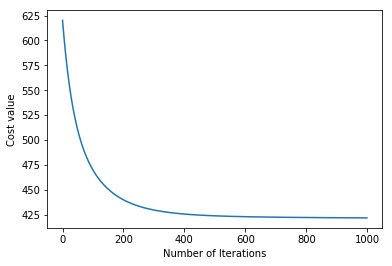

In [194]:
plot(np.arange(itr), trainCost)

In [195]:
computeCost(testY,test_y,beta)

638.6113569321534

In [196]:
#Calculating test set final cost
testing,testCost,it = gradientDescent(testY,test_y,beta,itr,alpha,False,0)
print(testing)

[[ 6.4239935  -0.17735515  0.16032443  1.53701667  1.85606633 15.17654141
  -3.74447896  2.47504565 -4.48892389  0.0733313   1.24335878  0.
   0.78943759  0.90943865  0.90831466  0.87875902  0.85989712  0.83505271]]


In [197]:
finalTestCost = computeCost(testY,test_y,testing)
print(finalTestCost)

407.96132334138747


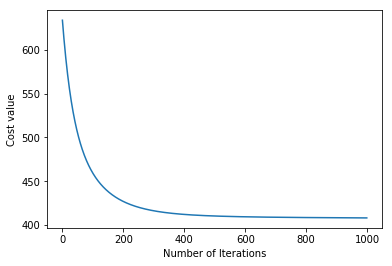

In [198]:
plot(np.arange(itr), testCost)

616.5966875783577
562.9070145598391
420.8169643914927
420.387011496654
420.26819770989556
420.2026764616883
420.1457454975499
1.2975828638257558e+279


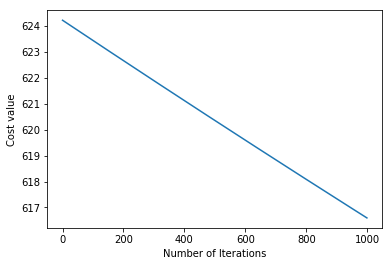

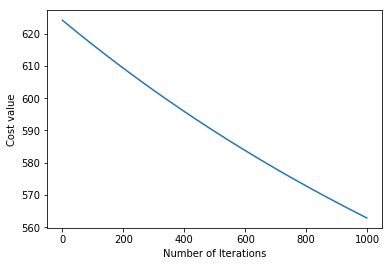

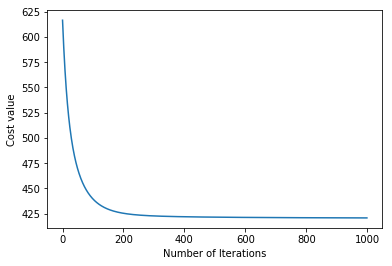

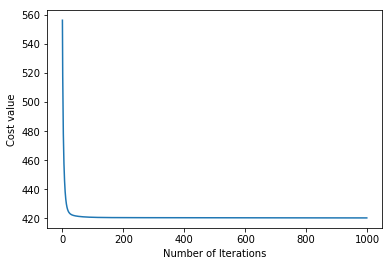

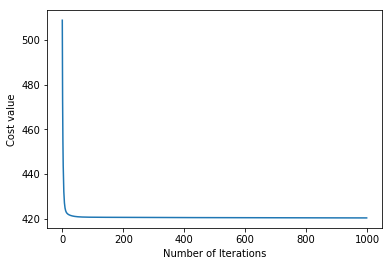

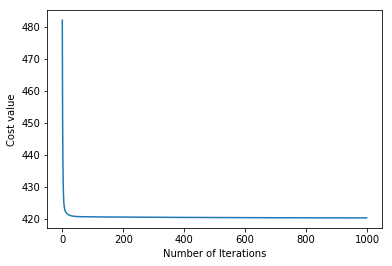

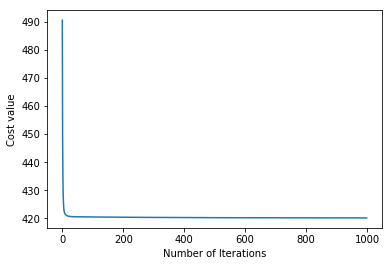

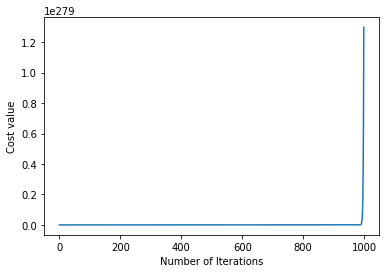

In [213]:
#Experiment number 1 : Checking different values of Alpha
alphaValues = [0.00001, 0.0001, 0.01, 0.1, 0.2, 0.3, 0.5, 0.7]
saveCostTrain = [0,0,0,0,0,0,0,0]

def differentAlpha(Y,y,beta,itr,alphaValues):
    g,Cost,it = gradientDescent(Y,y,beta,itr,alphaValues,False,0)
    finalCostTrain = computeCost(Y,y,g)
    print(finalCostTrain)
    plot(np.arange(itr), Cost)
    return finalCostTrain
    
for x in range(0,8):
    saveCostTrain[x] = differentAlpha(trainY,train_y,beta,itr,alphaValues[x])

629.6673422952854
566.697599446293
407.13461711486565
406.79052368357094
406.7711286382813
406.76138273299705
406.7521861764599
1.5957724408093017e+229


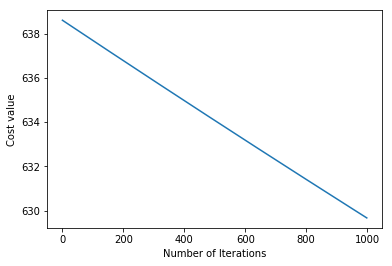

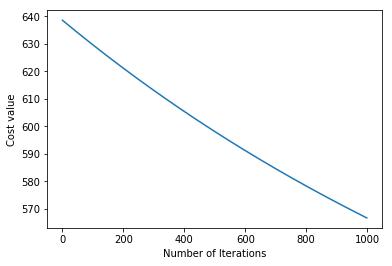

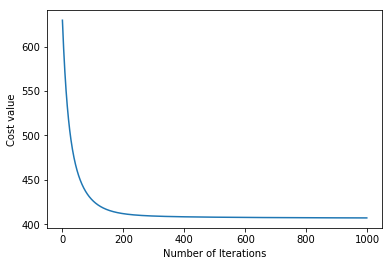

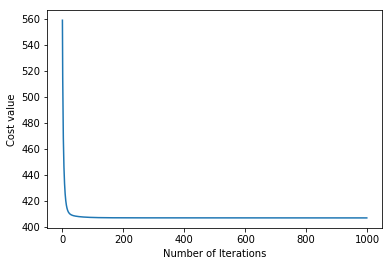

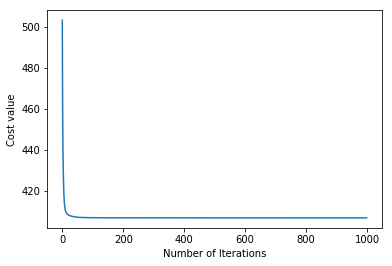

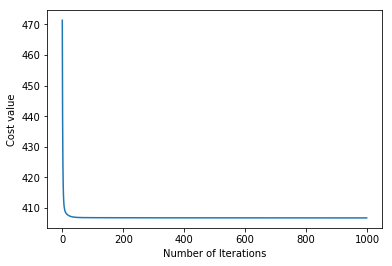

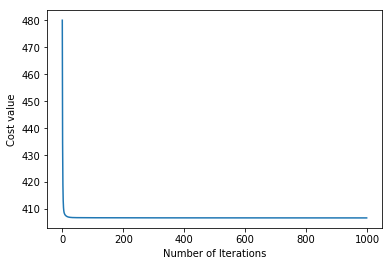

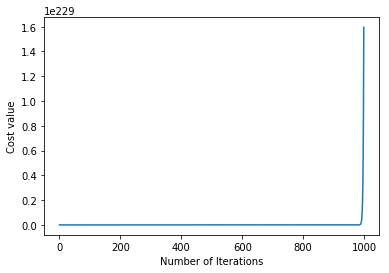

In [216]:
saveCostTest = [0,0,0,0,0,0,0,0]
for x in range(0,8):
    saveCostTest[x] = differentAlpha(testY,test_y,beta,itr,alphaValues[x])

[616.5966875783577, 562.9070145598391, 420.8169643914927, 420.387011496654, 420.26819770989556, 420.2026764616883, 420.1457454975499, 1.2975828638257558e+279]


Text(0, 0.5, 'Cost Values')

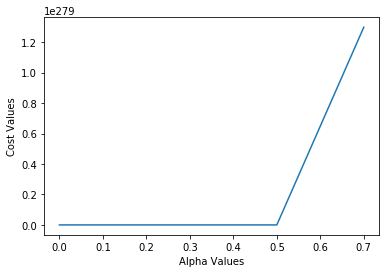

In [220]:
print(saveCostTrain)

fig, ax = plt.subplots()  
ax.plot(alphaValues, saveCostTrain)  
ax.set_xlabel('Alpha Values')  
ax.set_ylabel('Cost Values')

In [224]:
#Performing Experiment number 2 for threshold

chosen_alpha = 0.55 # From Previous example
threshold = [0.1,0.01,0.001,0.001,0.0001,0.00001,0.000001,0.0000001]

threshold_train_cost_collection=np.zeros(len(threshold))
threshold_test_cost_collection=np.zeros(len(threshold))
for x in range(len(threshold)):
    betas_train, thresh_train_cost,itTrain = gradientDescent(trainY, train_y, beta, itr, chosen_alpha, True, threshold[x])
    threshold_train_cost_collection[x] = computeCost(trainY, train_y, betas_train)
    betas_test, thresh_test_cost,itTest = gradientDescent(testY, test_y, beta, itr, chosen_alpha, True, threshold[x])
    threshold_test_cost_collection[x] = computeCost(testY, test_y, betas_test)
    
print(itTrain)

1000


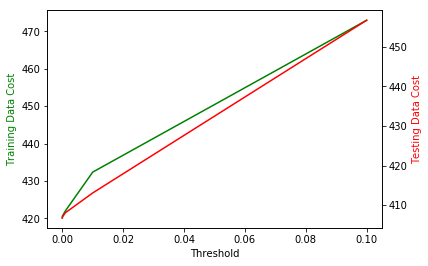

In [229]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(threshold, threshold_train_cost_collection, 'g-')
ax2.plot(threshold, threshold_test_cost_collection, 'r-')

ax1.set_xlabel('Threshold')
ax1.set_ylabel('Training Data Cost', color='g')
ax2.set_ylabel('Testing Data Cost', color='r')

plt.show()

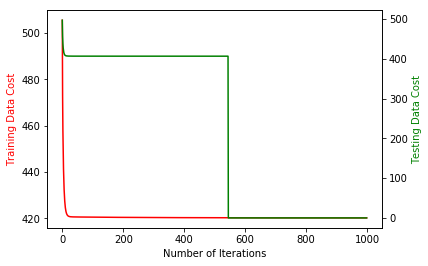

In [230]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(np.arange(itr), thresh_train_cost, 'r-')
ax2.plot(np.arange(itr), thresh_test_cost, 'g-')

ax1.set_xlabel('Number of Iterations')
ax1.set_ylabel('Training Data Cost', color='r')
ax2.set_ylabel('Testing Data Cost', color='g')

plt.show()

In [232]:
# Performing Experiment number 3
#We are selecting variables randomnly
alpha = 0.5

X1 = result.iloc[:, 0:1]
X2 = result.iloc[:, 40:44]
#print(X1)

X = np.concatenate((X1,X2), axis=1)
ones = np.ones([X.shape[0],1])
finalX = np.concatenate((ones,X),axis=1)

finaly = result.iloc[:,53:54].values
beta = np.zeros([1,6])

finalg,finalCostValueRandom,it = gradientDescent(finalX,finaly,beta,itr,alpha,True,0.00001)
costvalue = computeCost(finalX, finaly, finalg)


In [233]:
#Printing our Output
print(finalg)
print(costvalue)

[[6.69063618 2.33533487 0.53502877 1.0318342  1.53713197 0.62837825]]
599.2646649451017


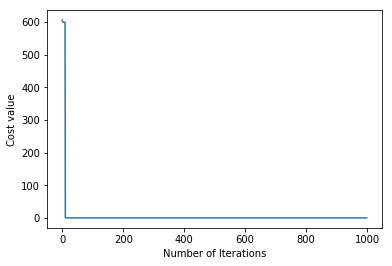

In [235]:
#Plotting the results

plot(np.arange(itr), finalCostValueRandom)

[[  7.13287401   0.91451254 -11.13454141  19.46858993  -0.14881896
    0.89894253]]
497.4034729097722
[[ 7.22057905e+00  1.66525305e+00 -1.28468273e+01  2.13439379e+01
  -1.07684358e-03  3.50286926e-01]]
487.4668263809107


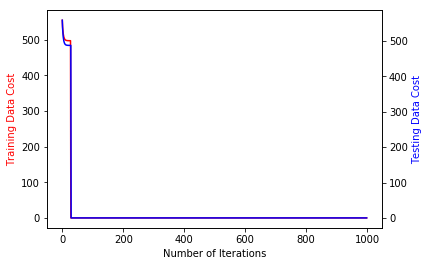

In [238]:
#Performing Experiment Number  4
#Selected variables
alpha = 0.5 #As we are taking this value

X1 = result.iloc[:, 0:1]
X2 = result.iloc[:, 31:33]
X3 = result.iloc[:, 40:42]

X = np.concatenate((X1,X2,X3), axis=1)
ones = np.ones([X.shape[0],1])
finalX = np.concatenate((ones,X),axis=1)

finaly = result.iloc[:,53:54].values
beta = np.zeros([1,6])

finaltrainX, finaltestX, finaltrainy, finaltesty = train_test_split(finalX, finaly, test_size=0.3, random_state=1)

finaltraining,finaltrainCostValue,it = gradientDescent(finaltrainX,finaltrainy,beta,itr,alpha,True,0.00001)
trainingcostvalue = computeCost(finaltrainX, finaltrainy, finaltraining)

finaltestg,finaltestCostValue,it = gradientDescent(finaltestX,finaltesty,beta,itr,alpha,True,0.00001)
testingcostvalue = computeCost(finaltestX, finaltesty, finaltestg)


print(finaltraining)
print(trainingcostvalue)

print(finaltestg)
print(testingcostvalue)


#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(np.arange(itr), finaltrainCostValue, 'r-')
ax2.plot(np.arange(itr), finaltestCostValue, 'b-')

ax1.set_xlabel('Number of Iterations')
ax1.set_ylabel('Training Data Cost', color='r')
ax2.set_ylabel('Testing Data Cost', color='b')

plt.show()